In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

%matplotlib inline 

In [2]:
wine=pd.read_csv('winequality-white.csv', delimiter=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
wine = wine[['sulphates','alcohol']]

In [4]:
wine.head()

,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9


In [5]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
sulphates,4898.0,0.489847,0.114126,0.22,0.41,0.47,0.55,1.08
alcohol,4898.0,10.514267,1.230621,8.00,9.50,10.40,11.40,14.20


In [6]:
#we need to scale the data because sulphates are in the range of 0 to 1 and alcohol has value of 10

In [7]:
#'scale' can also be used for standardization instead of using standard scaler
#just that the output of scale is a Matrix and we need to convert it back to dataframe 

wine_std = pd.DataFrame(scale(wine), columns=list(wine.columns))

In [8]:
wine_std.describe().T

,count,mean,std,min,25%,50%,75%,max
sulphates,4898.0,-7.572999e-16,1.000102,-2.364709,-0.699710,-0.173921,0.527131,5.171602
alcohol,4898.0,-2.178784e-15,1.000102,-2.043297,-0.824276,-0.092863,0.719818,2.995326


In [9]:
range_n_clusters = [2,3,4,5,6,8,9]

In [10]:
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std)
    
    print(k, silhouette_score(wine_std, kmeans.labels_))

2 0.3728351443736061
3 0.41091001275496236
4 0.35830133238288514
5 0.3357477953688114
6 0.348440384432993
8 0.35473986231563287
9 0.34981640766003724


In [11]:
#silhouette_score is highest for k=3

In [12]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(wine_std)

KMeans(n_clusters=3)

In [13]:
labels = kmeans.labels_
wine['clusters'] = labels 

C:\Users\Jay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
wine['clusters'].value_counts()

1    2266
0    1474
2    1158
Name: clusters, dtype: int64

In [15]:
wine.groupby(['clusters']).mean()

,sulphates,alcohol
clusters,,
0,0.417374,11.806174
1,0.457639,9.552390
2,0.645121,10.752041


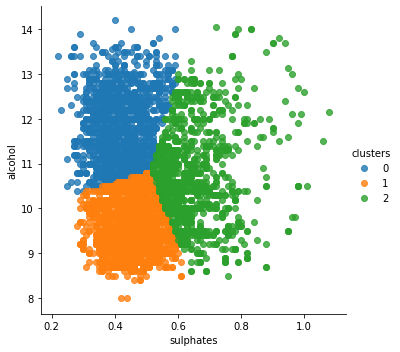

In [17]:
sns.lmplot(fit_reg=False, x='sulphates', y='alcohol', data=wine, hue='clusters')

In [19]:
from sklearn.cluster import AgglomerativeClustering 

In [21]:
for n_clusters in range(2,10):
    cls_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cls_lables=cls_model.fit_predict(wine_std)
    sil_avg = silhouette_score(wine_std, cls_lables, metric='euclidean')
    print(n_clusters, sil_avg)

2 0.3091095689547383
3 0.36507065689263013
4 0.36394118955693916
5 0.2849369402765109
6 0.28173689619112985
7 0.30584775050004287
8 0.29918403546397854
9 0.2931385252344828


In [26]:
hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [27]:
labels_hie_clus = hie_clus.fit_predict(wine_std)

In [28]:
wine['clusters_hie'] = labels_hie_clus

C:\Users\Jay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


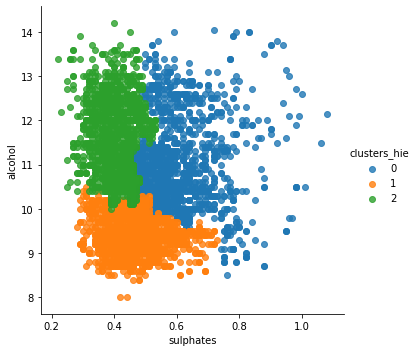

In [29]:
sns.lmplot(fit_reg=False, x='sulphates', y='alcohol', data=wine, hue='clusters_hie')

In [31]:
df=pd.read_csv('moon_data.csv')

In [32]:
df.head()

,Unnamed: 0,X,Y
0,0,1.045255,0.332214
1,1,0.801944,-0.411547
2,2,-0.749356,0.775108
3,3,0.975674,0.191768
4,4,-0.512188,0.929997


In [33]:
df.drop(['Unnamed: 0'],axis='columns', inplace=True)
df.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


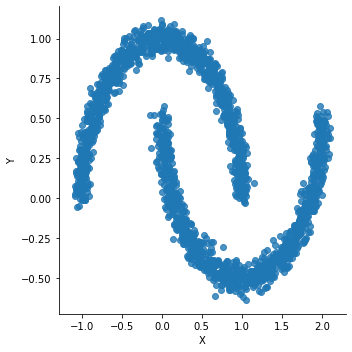

In [34]:
sns.lmplot(fit_reg=False, x='X', y='Y', data=df)

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
df['clusters'] = kmeans.labels_

In [36]:
df.head()

,X,Y,clusters
0,1.045255,0.332214,1
1,0.801944,-0.411547,1
2,-0.749356,0.775108,0
3,0.975674,0.191768,1
4,-0.512188,0.929997,0


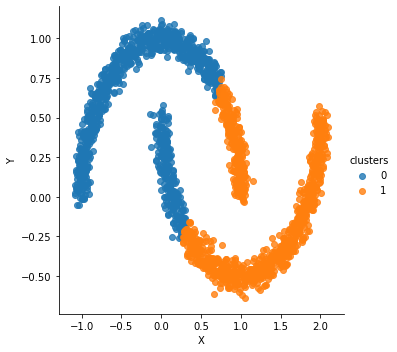

In [37]:
sns.lmplot(fit_reg=False, x='X', y='Y', data=df, hue='clusters')

In [38]:
df.drop(['clusters'], axis='columns', inplace=True)

In [39]:
df.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


In [40]:
from sklearn.cluster import DBSCAN

In [42]:
db=DBSCAN(eps=0.1, min_samples=30, metric='euclidean')

In [43]:
db.fit(df)

DBSCAN(eps=0.1, min_samples=30)

In [44]:
df['clusters'] = db.labels_

In [45]:
df.head()

,X,Y,clusters
0,1.045255,0.332214,1
1,0.801944,-0.411547,0
2,-0.749356,0.775108,1
3,0.975674,0.191768,1
4,-0.512188,0.929997,1


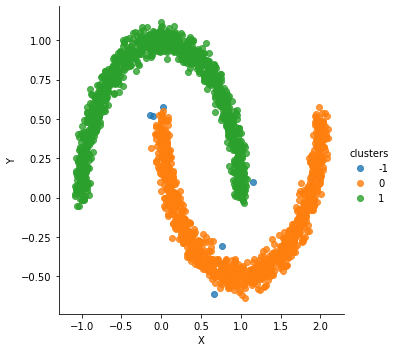

In [46]:
sns.lmplot(fit_reg=False, x='X', y='Y', data=df, hue='clusters')

In [48]:
df['clusters'].value_counts()
# -1 is outlier 

 1    999
 0    995
-1      6
Name: clusters, dtype: int64

In [49]:
#check silhouette_score for both 